# autism-project

Use the "Run" button to execute the code.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')
################################################################
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D ,BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K
################################################################
import os
import cv2
from PIL import Image
import numpy as np
 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir ='/content/drive/MyDrive/ASD/CNN/Dataset1/'

In [ ]:
image_ext=['jpg']

In [ ]:
SIZE =140
dataset =[]
label =[]

Autistic_images = os.listdir('/content/drive/MyDrive/ASD/CNN/Dataset1/Autistic1/')
for image_name in (Autistic_images):
       image = cv2.imread('/content/drive/MyDrive/ASD/CNN/Dataset1/Autistic1/'+image_name)
       image = Image.fromarray(image, 'RGB')
       image = image.resize((SIZE, SIZE))
       dataset.append(np.array(image))
       label.append(0)


In [ ]:
Nonautistic_images =os.listdir('/content/drive/MyDrive/ASD/CNN/Dataset1/Non_Autistic/')
for image_name in Nonautistic_images:
        image = cv2.imread('/content/drive/MyDrive/ASD/CNN/Dataset1/Non_Autistic/'+image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [ ]:
dataset = np.array(dataset)
label = np.array(label)

**Preprocessing**

**Load Data**

In [ ]:
import numpy as np
from  matplotlib import pyplot as plt
import tensorflow as tf


In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/ASD/CNN/Dataset1/')

Found 280 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

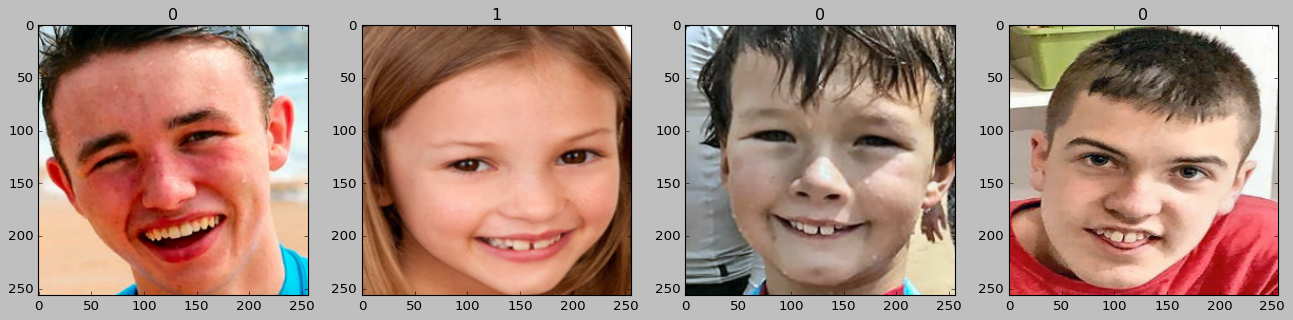

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])


Scale Data

In [ ]:
data = data.map(lambda x,y:(x/255,y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.00215515, 0.00252424, 0.002555  ],
          [0.00212226, 0.00255286, 0.002599  ],
          [0.00212226, 0.00255286, 0.002599  ],
          ...,
          [0.00230681, 0.00273741, 0.00279892],
          [0.00230681, 0.00273741, 0.00279892],
          [0.0023333 , 0.0027639 , 0.00282542]],
 
         [[0.00215348, 0.00251617, 0.00254906],
          [0.00215302, 0.00253749, 0.002599  ],
          [0.00215302, 0.00253749, 0.002599  ],
          ...,
          [0.00230681, 0.00273741, 0.00279892],
          [0.00233756, 0.00276817, 0.00282968],
          [0.00232218, 0.00275279, 0.0028143 ]],
 
         [[0.00217479, 0.00253749, 0.00256611],
          [0.0021684 , 0.00255286, 0.00261438],
          [0.00215773, 0.0025422 , 0.00260372],
          ...,
          [0.00231747, 0.00274807, 0.00280959],
          [0.00232218, 0.00275279, 0.0028143 ],
          [0.00230681, 0.00273741, 0.00279892]],
 
         ...,
 
         [[0.00210688, 0.00253749, 0.002599  ],
          [0.00211

Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

6

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test =data.skip(train_size+val_size).take(test_size)

Build Deep Learning Model

In [ ]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from sklearn.model_selection import  train_test_split
import tensorflow as tf
import keras



In [ ]:
model =Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 19s 3s/step - loss: 0.6936 - accuracy: 0.4583 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 17s 3s/step - loss: 0.6932 - accuracy: 0.5052 - val_loss: 0.6920 - val_accuracy: 0.5625
Epoch 3/20
6/6 [==============================] - 21s 4s/step - loss: 0.6935 - accuracy: 0.5052 - val_loss: 0.6950 - val_accuracy: 0.4062
Epoch 4/20
6/6 [==============================] - 17s 3s/step - loss: 0.6936 - accuracy: 0.4948 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/20
6/6 [==============================] - 16s 3s/step - loss: 0.6925 - accuracy: 0.5365 - val_loss: 0.6958 - val_accuracy: 0.4375
Epoch 6/20
6/6 [==============================] - 19s 3s/step - loss: 0.6937 - accuracy: 0.5104 - val_loss: 0.6783 - val_accuracy: 0.6875
Epoch 7/20
6/6 [==============================] - 16s 3s/step - loss: 0.6965 - accuracy: 0.4583 - val_loss: 0.6941 - val_accuracy: 0.4688
Epoch 8/20
6/6 [==================

In [ ]:
hist.history

{'loss': [0.6935742497444153,
  0.6931977272033691,
  0.6934590935707092,
  0.6935510039329529,
  0.6925298571586609,
  0.6936907172203064,
  0.6964696049690247,
  0.6932876706123352,
  0.6930435299873352,
  0.6931915283203125,
  0.6933469176292419,
  0.6933155059814453,
  0.693156898021698,
  0.6928620338439941,
  0.691885232925415,
  0.6897320747375488,
  0.6878504753112793,
  0.6893588900566101,
  0.680493175983429,
  0.6539709568023682],
 'accuracy': [0.4583333432674408,
  0.5052083134651184,
  0.5052083134651184,
  0.4947916567325592,
  0.5364583134651184,
  0.5104166865348816,
  0.4583333432674408,
  0.484375,
  0.515625,
  0.4427083432674408,
  0.484375,
  0.4895833432674408,
  0.5,
  0.5572916865348816,
  0.59375,
  0.5625,
  0.5364583134651184,
  0.5677083134651184,
  0.6041666865348816,
  0.671875],
 'val_loss': [0.6931746006011963,
  0.691963791847229,
  0.6949704885482788,
  0.6931576728820801,
  0.6958088278770447,
  0.6782847046852112,
  0.69407057762146,
  0.693032383918

Plot Performance

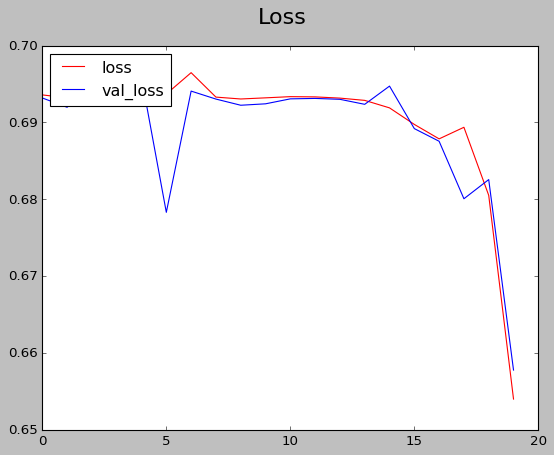

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'],color='blue', label= 'val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

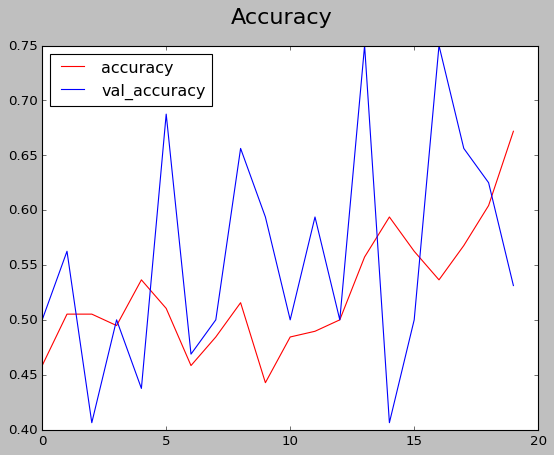

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'],color='blue', label= 'val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update1_state(y, yhat)
  re.update_state(y.yhat)
  acc.update_state(y,yhat)


In [ ]:
print(pre.result(),re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


Test

In [ ]:
import cv2
import matplotlib.image as mpimg

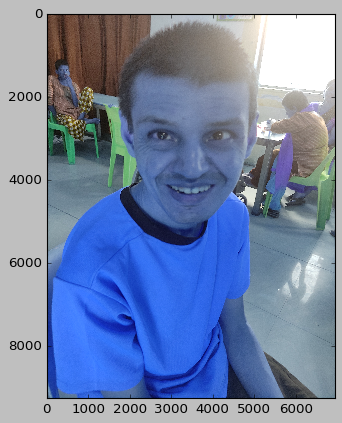

In [ ]:
path ='/content/drive/MyDrive/ASD/AmitChheda.jpg'
img = cv2.imread(path)
plt.imshow(img)
plt.show()

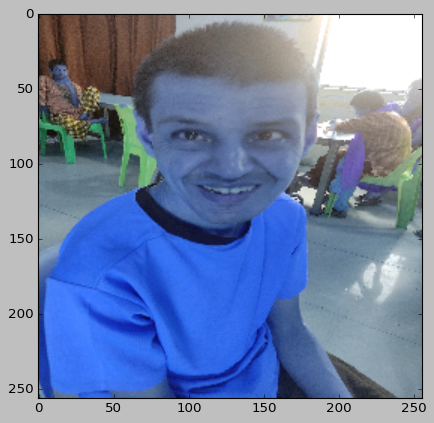

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 186ms/step


In [ ]:
yhat

array([[0.28058776]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print(f'Non Autistic')
else:
  print(f'Autistic')

Autistic


Save the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 123ms/step


array([[0.28058776]], dtype=float32)